In [2]:
import pandas as pd

In [3]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from numpy.random import default_rng

In [17]:
diabetes_df = pd.read_csv('C:/Users/Administrator/Desktop/assignment2/diabetes.csv')

In [18]:
# Set a seed for reproducibility
seed = 123
rng = default_rng(seed)


In [19]:
# Take a random sample of 25 observations
sample_size = 25
sample = diabetes_df.sample(n=sample_size, random_state=rng)

In [20]:
# Calculate sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

In [21]:
# Calculate population statistics
population_mean_glucose = diabetes_df['Glucose'].mean()
population_max_glucose = diabetes_df['Glucose'].max()

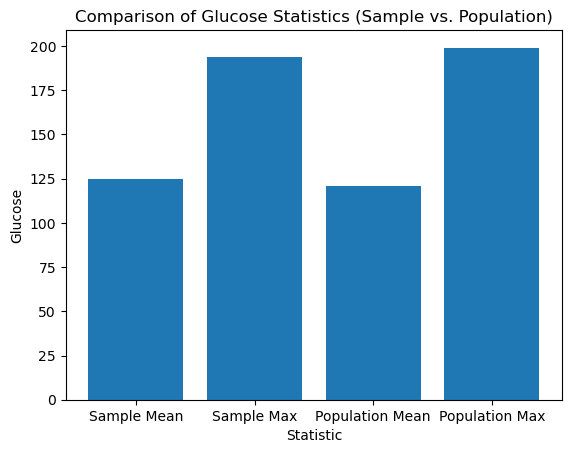

In [22]:
# Create a bar chart to compare sample and population statistics
plt.bar(['Sample Mean', 'Sample Max', 'Population Mean', 'Population Max'],
        [sample_mean_glucose, sample_max_glucose, population_mean_glucose, population_max_glucose])
plt.xlabel('Statistic')
plt.ylabel('Glucose')
plt.title('Comparison of Glucose Statistics (Sample vs. Population)')
plt.show()

In [23]:
#b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

In [24]:
# Calculate percentile for sample and population
sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi = np.percentile(diabetes_df['BMI'], 98)

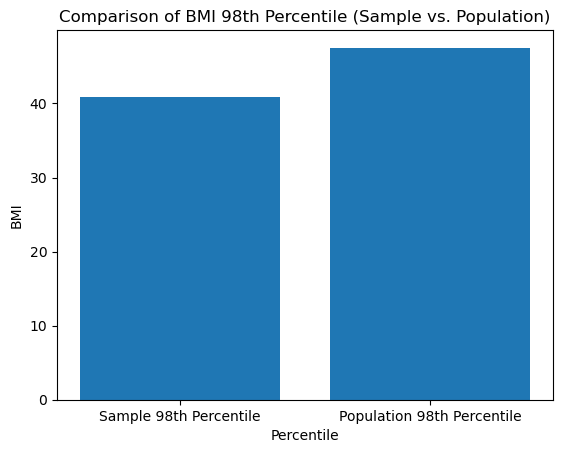

In [25]:
# Create a bar chart to compare sample and population percentiles
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'],
        [sample_percentile_bmi, population_percentile_bmi])
plt.xlabel('Percentile')
plt.ylabel('BMI')
plt.title('Comparison of BMI 98th Percentile (Sample vs. Population)')
plt.show()

In [32]:
#c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
#population and find the average mean,
#standard deviation and percentile for BloodPressure and compare this with these statistics from the population 
#for the same variable. Again, you should create charts for this comparison. Report on your findings.  
n_bootstrap_samples = 500
n_obs_per_bootstrap_sample = 150
bootstrap_samples_bp = []
for i in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(diabetes_df['BloodPressure'], size=n_obs_per_bootstrap_sample, replace=True)
    bootstrap_samples_bp.append(bootstrap_sample)

In [33]:
# Calculate statistics for bootstrap samples
mean_bp_bootstrap = np.mean(bootstrap_samples_bp, axis=1)
std_bp_bootstrap = np.std(bootstrap_samples_bp, axis=1)
percentile_bp_bootstrap = np.percentile(bootstrap_samples_bp, 90, axis=1)


In [34]:
# Calculate statistics for population
mean_bp_population = diabetes_df['BloodPressure'].mean()
std_bp_population = diabetes_df['BloodPressure'].std()
percentile_bp_population = np.percentile(diabetes_df['BloodPressure'], 90)

Text(0.5, 1.0, 'Comparison of Mean Blood Pressure: Bootstrap Sample vs Population')

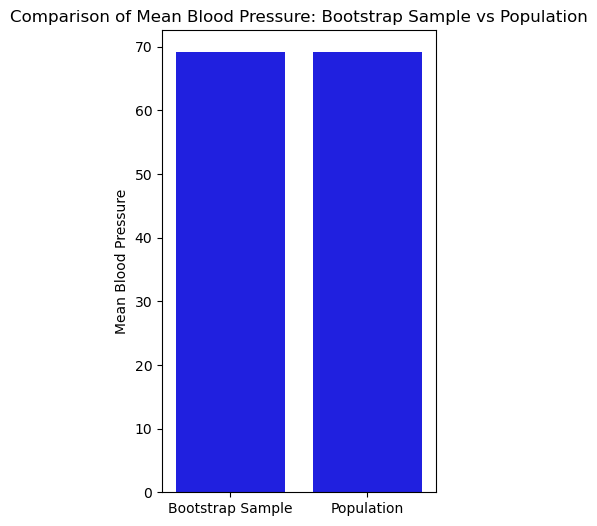

In [35]:
# Create bar plots for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x=['Bootstrap Sample', 'Population'], y=[np.mean(mean_bp_bootstrap), mean_bp_population], color='blue')
plt.ylabel('Mean Blood Pressure')
plt.title('Comparison of Mean Blood Pressure: Bootstrap Sample vs Population')

Text(0.5, 1.0, 'Comparison of Standard Deviation of Blood Pressure: Bootstrap Sample vs Population')

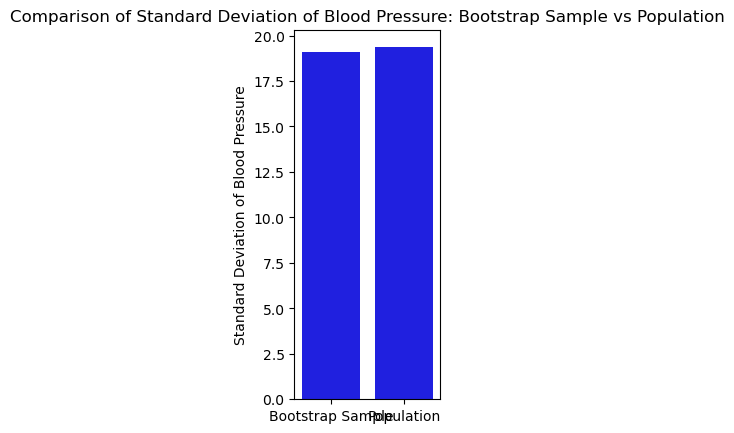

In [36]:
plt.subplot(1, 3, 2)
sns.barplot(x=['Bootstrap Sample', 'Population'], y=[np.mean(std_bp_bootstrap), std_bp_population], color='blue')
plt.ylabel('Standard Deviation of Blood Pressure')
plt.title('Comparison of Standard Deviation of Blood Pressure: Bootstrap Sample vs Population')

Text(0.5, 1.0, 'Comparison of 90th Percentile of Blood Pressure: Bootstrap Sample vs Population')

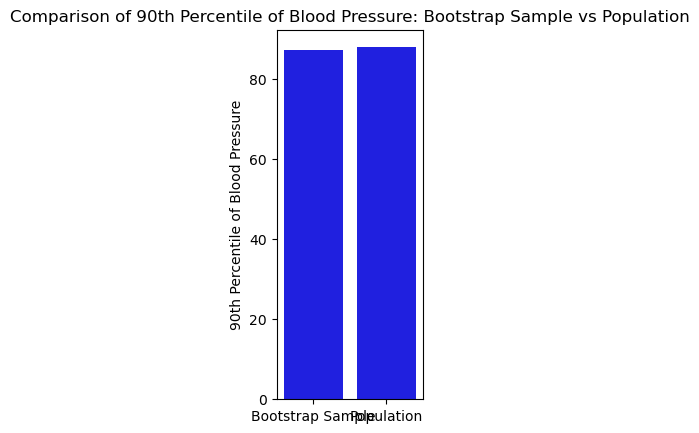

In [37]:
plt.subplot(1, 3, 3)
sns.barplot(x=['Bootstrap Sample', 'Population'], y=[np.mean(percentile_bp_bootstrap), percentile_bp_population], color='blue')
plt.ylabel('90th Percentile of Blood Pressure')
plt.title('Comparison of 90th Percentile of Blood Pressure: Bootstrap Sample vs Population')

In [ ]:
#Findings

In [ ]:
#Based on the findings from the comparison charts, we can observe that the statistics 
#(mean, standard deviation, and percentile) calculated from the bootstrap samples are very close to the 
#statistics calculated from the population for the BloodPressure variable. This suggests that the bootstrap 
#sampling is able to capture the variability in the population data and provide reliable estimates for the statistics 
#of interest.